### Cores

In [70]:
#!pip install sympy
#!pip install tbcontrol
#!pip install control
#!pip install slycot
#!pip install ipywidgets


In [71]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import control as ct
import scipy
from control.matlab import *
from numpy.linalg import matrix_rank



In [72]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'dred': (0.839, 0.0, 0.027),
    'dgreen': (0.341, 0.494, 0.094),
    'dblue': (0.063, 0.318, 0.475),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### Parâmetros

In [73]:
#constantes
R=0.2
Ea=380
k_e=145000
b_e=2560
k_c=145000
b_c=2560
m_e=1000
m_c=900
K=50
g=9.81

## 1.1 Definição das Matrizes

In [74]:
# Matrizes do Sistema Linearizado
A = np.array([[-(k_e + k_c)/(b_c+b_e), -k_e/(b_c*R + b_e*R), k_c/(b_c*R + b_e*R), -b_e/(b_c*R + b_e*R), b_c/(b_c*R + b_e*R)],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [-k_e*R/m_e, -k_e/m_e, 0, -b_e/m_e, 0],
              [k_c*R/m_c, 0, -k_c/m_c, 0, -b_c/m_c]])

B = np.array([[K/(R*R*(b_c+b_e))], [0], [0], [0], [0]])
C = np.array([[0,0,0,0,0],[0,0,0,1,0],[0,0,0,0,0]])
D = [[0],[0],[0]]
E = np.array([[0],[0],[0],[0],[0]])


In [75]:
#Sistema en malha aberta na forma de espaço de estados

elevador_SS = ct.ss(A, B, C, D)
print(elevador_SS)


<LinearIOSystem>: sys[54]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (5): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]']

A = [[ -56.640625   -141.6015625   141.6015625    -2.5           2.5       ]
     [   0.            0.            0.            1.            0.        ]
     [   0.            0.            0.            0.            1.        ]
     [ -29.         -145.            0.           -2.56          0.        ]
     [  32.22222222    0.         -161.11111111    0.           -2.84444444]]

B = [[0.24414062]
     [0.        ]
     [0.        ]
     [0.        ]
     [0.        ]]

C = [[0. 0. 0. 0. 0.]
     [0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0.]]

D = [[0.]
     [0.]
     [0.]]



## 1.2 Simulação - Sistema Linear

[[ 9.00000000e+00  2.53199865e+00 -9.41097616e-01 ...  4.55478474e+01
   4.55478475e+01  4.55478477e+01]
 [ 1.50000000e+00  1.47989195e+00  1.43121781e+00 ... -9.10956994e+00
  -9.10956977e+00 -9.10956960e+00]
 [-1.00000000e+00 -9.81667357e-01 -9.39500854e-01 ...  9.10956901e+00
   9.10956924e+00  9.10956947e+00]
 [ 0.00000000e+00 -3.69018735e+00 -5.85676311e+00 ...  1.66922587e-05
   1.67915933e-05  1.66021296e-05]
 [ 0.00000000e+00  3.30060670e+00  4.92824539e+00 ...  2.33309966e-05
   2.32549620e-05  2.28634127e-05]]


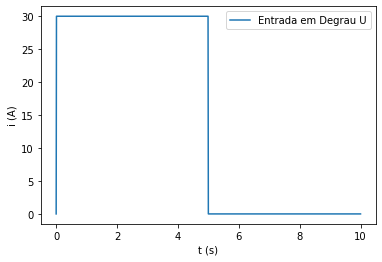

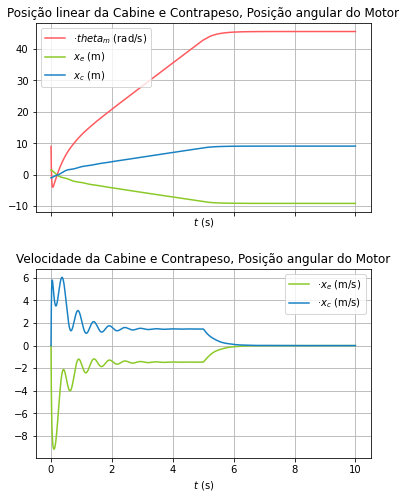

In [76]:
#PLOT MALHA ABERTA - LINEAR 

ts = np.linspace(0, 10, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [9, 1.5, -1, 0, 0]

U_deg_lista = ([]) # Esforço aplicado à torreta - entrada em degrau
#calcula as entradas para cada instante de tempo
for t in ts:
  if 0 < t < 5:
    U_deg_lista.append(30)
  #elif 7.5 < t < 8.5:
    #U_deg_lista.append(-40)
  else:
    U_deg_lista.append(0)
    

plt.plot(ts, U_deg_lista, label='Entrada em Degrau U')
plt.xlabel('t (s)')
plt.ylabel('i (A)')
plt.legend()

returnSimulation = ct.forced_response(elevador_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)

fig, (state_ain, state_pend) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

print(returnSimulation.states)

#state_pend.plot(returnSimulation.time, returnSimulation.states[3,:], color=cp['red'], label=r'$dot theta_m$ (rad/s)')
state_pend.plot(returnSimulation.time, returnSimulation.states[3, :], color=cp['green'], label=r'$\dot x_e$ (m/s)')
state_pend.plot(returnSimulation.time, returnSimulation.states[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(returnSimulation.time, returnSimulation.states[0, :], color=cp['red'], label=r'$\dot theta_m$ (rad/s)')
state_ain.plot(returnSimulation.time, returnSimulation.states[1, :], color=cp['green'], label=r'$x_e$ (m)')
state_ain.plot(returnSimulation.time, returnSimulation.states[2, :], color=cp['blue'], label=r'$x_c$ (m)')

# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3)

# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Velocidade da Cabine e Contrapeso, Posição angular do Motor')
state_ain.set_title('Posição linear da Cabine e Contrapeso, Posição angular do Motor')
state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()

## 2.1. Verificação de controlabilidade e observabilidade

In [77]:

print('Posto de controlabilidade = ', np.linalg.matrix_rank(ct.ctrb(A, B)))
print('Posto de observabilidade = ', np.linalg.matrix_rank(ct.obsv(A, C)))

Posto de controlabilidade =  5
Posto de observabilidade =  4


In [78]:
#Matriz de controlabilidade
Ctb = ct.ctrb(A, B)
Ctb

matrix([[ 2.44140625e-01, -1.38282776e+01,  8.20609364e+02,
         -4.65810811e+04,  2.63864083e+06],
        [ 0.00000000e+00,  0.00000000e+00, -7.08007812e+00,
          4.19145050e+02, -2.38440716e+04],
        [ 0.00000000e+00,  0.00000000e+00,  7.86675347e+00,
         -4.67954377e+02,  2.65055061e+04],
        [ 0.00000000e+00, -7.08007812e+00,  4.19145050e+02,
         -2.38440716e+04,  1.35111614e+06],
        [ 0.00000000e+00,  7.86675347e+00, -4.67954377e+02,
          2.65055061e+04, -1.50094674e+06]])

In [79]:
#Matriz de Observabilidade
Obs = ct.obsv(A, C)
Obs

matrix([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [-2.90000000e+01, -1.45000000e+02,  0.00000000e+00,
         -2.56000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 1.71681813e+03,  4.47764531e+03, -4.10644531e+03,
         -6.59464000e+01, -7.25000000e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    

## 2.2 Verificação da Estabilidade

In [80]:
print("autovalores de A = ", np.linalg.eig(A)[0])
#ct.pzmap(elevador_SS)

autovalores de A =  [-5.66406250e+01 +0.j         -2.81804879e-16 +0.j
 -2.69509212e+00 +0.j         -1.35467616e+00+12.29635034j
 -1.35467616e+00-12.29635034j]


## 3.1 Projeto de Controlador LQR

In [81]:
Q = np.diag([10, 10, 10, 10, 10])
R = [1]

# Matriz de ganhos de controle
K_lq, P_lq, poles_lq = ct.lqr(elevador_SS, Q, R)

# Polos do sistema em malha fechada
print("Polos lqr:",poles_lq)
print("Ganhos lqr:",K_lq)

Polos lqr: [-56.64331519 +0.j          -2.62142593 +0.j
  -0.82484021 +0.j          -1.35475156+12.29630625j
  -1.35475156-12.29630625j]
Ganhos lqr: [[ 3.08844541 -0.57536353  0.41408612 -3.00380396  2.72373603]]


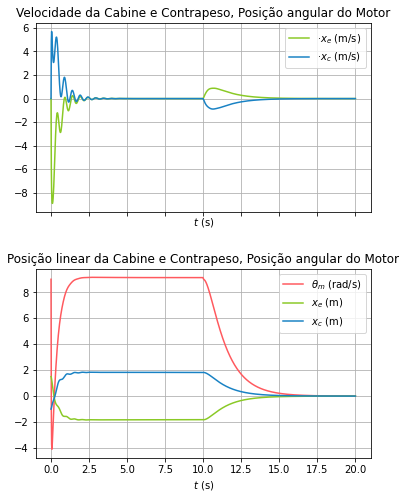

In [82]:
A_lqr = A - np.matmul(B, K_lq)

elevador_CLLQ_SS = ct.ss(A - np.dot(B, K_lq), B, C, D)

ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [9, 1.5, -1, 0, 0]

returnSimulation_lqr = ct.forced_response(elevador_CLLQ_SS, U=U_deg_lista, T=ts, X0=x0, return_x=False)

fig, (state_pend, state_ain) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

#state_pend.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[], color=cp['red'], label=r'$dot theta_m$ (rad/s)')
state_pend.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[3, :], color=cp['green'], label=r'$\dot x_e$ (m/s)')
state_pend.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[0, :], color=cp['red'], label=r'$\theta_m$ (rad/s)')
state_ain.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[1, :], color=cp['green'], label=r'$x_e$ (m)')
state_ain.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[2, :], color=cp['blue'], label=r'$x_c$ (m)')

# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3)

# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Velocidade da Cabine e Contrapeso, Posição angular do Motor')
state_ain.set_title('Posição linear da Cabine e Contrapeso, Posição angular do Motor')
state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()

## 3.2 Projeto de controlador por alocação de pólos

In [83]:
# Matriz de ganhos de controle
K_pp = ct.place(A, B,poles_lq)  # polos obtidos a partir do LQR

# K_pp = ct.place(A, B, [-7+3j, -7-3j, -0.5, -0.6]) # "agressivo"

print(K_pp)

# Verificação dos autovalores de (A - B K)
print("polos de malha fechada = ",
      np.linalg.eig(A - np.dot(B, K_pp))[0])

[[ 3.08844541 -0.57536353  0.41408612 -3.00380396  2.72373603]]
polos de malha fechada =  [-56.64331519 +0.j          -2.62142593 +0.j
  -0.82484021 +0.j          -1.35475156+12.29630625j
  -1.35475156-12.29630625j]


In [84]:

# Sistema em malha fechada na forma de espaço de estados
elevador_CLPP_SS = ct.ss(A - np.dot(B, K_pp), B, C, D)

elevador_CLPP_SS

<LinearIOSystem:sys[56]:['u[0]']->['y[0]', 'y[1]', 'y[2]']>

In [85]:
ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [9, 1.5, -1, 0, 0]


U_deg_lista = ([]) # Esforço aplicado à torreta - entrada em degrau
#calcula as entradas para cada instante de tempo
for t in ts:
  if 0 < t < 5:
    U_deg_lista.append(30)
  #elif 7.5 < t < 8.5:
    #U_deg_lista.append(-40)
  else:
    U_deg_lista.append(0)

t, u, x = ct.forced_response(elevador_CLPP_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)
returnSimulation_aloc= ct.forced_response(elevador_CLPP_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)
print(returnSimulation_aloc.outputs)

esforcos_aloc = -K_pp * x.T

plt.plot(t, esforcos_aloc[:,1],label=r'$\theta_m$ (m/s)')
plt.plot(t, esforcos_aloc[:,2],label=r'$x_e$ (m/s)')
plt.plot(t, esforcos_aloc[:,3],label=r'$x_c$ (m/s)')
plt.legend()
plt.title('Esforços de Controle')
plt.xlabel('Tempo (s)')
plt.grid()
plt.ylabel('Esforços de Controle (N)')
 
fig, (state_ain, state_pend) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

state_pend.plot(t, x[3, :], color=cp['green'], label=r'$\dot x_e$ (m/s)')
state_pend.plot(t, x[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(t, x[0, :], color=cp['red'], label=r'$\theta_m$ (rad/s)')
state_ain.plot(t, x[1, :], color=cp['green'], label=r'$x_e$ (m)')
state_ain.plot(t, x[2, :], color=cp['blue'], label=r'$x_c$ (m)')


# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3)

# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Velocidade da Cabine e Contrapeso, Posição angular do Motor')
state_ain.set_title('Posição linear da Cabine e Contrapeso, Posição angular do Motor')
state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.82301699e+00 -7.85753944e+00 ...  9.67749548e-06
   9.51915907e-06  9.36341457e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


ValueError: shapes (1,5) and (1001,5) not aligned: 5 (dim 1) != 1001 (dim 0)

## 3.3 Projeto de Observador de Luenberger

In [ ]:
"Projeto Observador de Luenberger"
print(poles_lq)
L = ct.place(A.T, C.T, poles_lq)
Ltrans = L.T

print("Ganhos do Observador",L)

A_obs=  A_lqr - np.matmul(Ltrans,C)
B_obs = np.column_stack((B,L.T))
C_obs = np.eye(5,5)
D_obs = np.zeros(shape=(5,4))

print(B_obs.shape,D_obs.shape)

print("polos de malha fechada = ",
      np.linalg.eig(A_obs)[0])


elevador_obs = ct.ss(A_obs, B_obs, C_obs, D_obs)

[-56.64331519 +0.j          -2.62142593 +0.j
  -0.82484021 +0.j          -1.35475156+12.29630625j
  -1.35475156-12.29630625j]


ValueError: The poles you've chosen can't be placed. Check the controllability matrix and try another set of poles

In [ ]:
'OBSERVADOR MALHA FECHADA'

ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0_obs = np.array([0.1, 0.1, -0., 0, 0])

input_obs = np.row_stack((returnSimulation_lqr.inputs,returnSimulation_lqr.outputs))

returnSimulation_obs = ct.forced_response(elevador_obs, U=input_obs, T=ts, X0=x0_obs, return_x=True)

statesObserver = returnSimulation_obs.states
statesSystem = returnSimulation_lqr.states

estimationError = statesSystem - statesObserver 

stateNumber = 0

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Angular')
state_erro1.set_title('Erro Estimado  Posição Angular')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xm.png")


stateNumber = 1
fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'],label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Elevador')
state_erro1.set_title('Erro Estimado Posição Elevador')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xe.png")


stateNumber = 2

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Contrapeso')
state_erro1.set_title('Erro Estimado Posição Contrapeso')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xc.png")


stateNumber = 3

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Velocidade Elevador')
state_erro1.set_title('Erro Estimado Velocidade Elevador')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xc.png")

stateNumber = 4

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Velocidade Contrapeso')
state_erro1.set_title('Erro Estimado Velocidade Contrapeso')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xc.png")

NameError: name 'elevador_obs' is not defined

In [ ]:
'OBSERVADOR MALHA ABERTA'

ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0_obs = [5, 2, -0.1, 0, 0]

input_obs = np.row_stack((returnSimulation.inputs,returnSimulation.outputs))
print(input_obs)

returnSimulation_obs = ct.forced_response(elevador_obs, U=input_obs, T=ts, X0=x0_obs, return_x=True)

statesObserver = returnSimulation_obs.states
statesSystem = returnSimulation.states

estimationError = statesSystem - statesObserver 

stateNumber = 0

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001], label=r'$dotx_c$ (m/s)')

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Angular')
state_erro1.set_title('Estado Estimado  Posição Angular')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MA_Xm.png")


stateNumber = 1
fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001], label=r'$dotx_c$ (m/s)')

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Elevador')
state_erro1.set_title('Estado Estimado  Posição Elevador')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MA_Xe.png")


stateNumber = 2
fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001], label=r'$dotx_c$ (m/s)')

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Contrapeso')
state_erro1.set_title('Estado Estimado  Posição Contrapeso')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MA_Xc.png")


[[ 0.00000000e+00  3.00000000e+01  3.00000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.69018735e+00 -5.85676311e+00 ...  1.66922587e-05
   1.67915933e-05  1.66021296e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


NameError: name 'elevador_obs' is not defined

## 3.4 Seguidor de Referência

In [ ]:
# degrau ou rampa
A_r = np.array([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0]])

In [ ]:
# seleção de variável para seguir referência
M = np.array([[0, 1, 0, 0, 0]])

# inversa da matriz de estados em MF
A_cl_inv = np.linalg.inv(A - B @ K_lq)

# ganho de pré-alimentação
N = np.linalg.inv(M @ A_cl_inv @ B) @ M @ A_cl_inv
G_r = N @ (A - A_r)




In [ ]:
n = 5           # variáveis de estados
r = 1           # entradas
m = 3           # saídas
l = 1           # perturbações

# matrizes do sistema estendido em malha fechada
A_ex_cl = np.block([[A - B @ G_r, B @ (K_lq - G_r)],
                    [A_r - A + B @ G_r, A_r - B @ (K_lq - G_r)]])
#l = E.shape[1]  # número de colunas deve ser igual ao de E

E_ex_cl = np.block([[E], [np.zeros((n, l))]])
K_ex = np.block([[-G_r, K_lq - G_r]])

# forma de espaço de estados
elevador_ex_cl_SS = ct.ss(A_ex_cl, E_ex_cl, K_ex, 0)
K_lq

matrix([[ 3.08844541, -0.57536353,  0.41408612, -3.00380396,  2.72373603]])

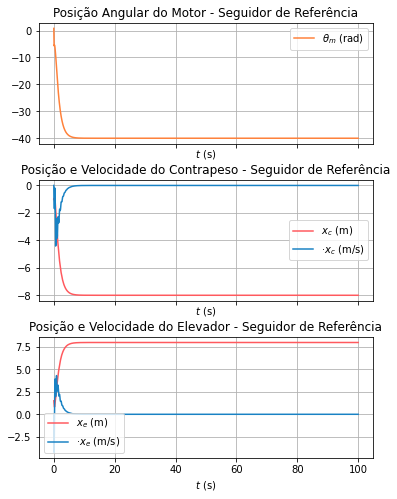

In [ ]:
w = np.linspace(0.1, 0.1, 1001)
#x0 = [0, 0.2, -0.2, 0, 0]
x0 = [0.8, 1.5, -1, 0, 0]
Us = np.ones(1001)

ts = np.linspace(0, 100, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [0.8, 1.5, -1, 0, 0,
      0.8, 6, -1, 0, 0]
# x0 = [0.0, 0.3, 0.0, 0.0,
#       0.0, 0.0, 1.0, 0.0]

U_deg_lista = ([]) # Corrente a qual o motor está submetido - entrada em degrau
#calcula as entradas para cada instante de tempo
for t in ts:
  if 0 < t < 5:
    U_deg_lista.append(30)
  #elif 7.5 < t < 8.5:
    #U_deg_lista.append(-40)
  else:
    U_deg_lista.append(0)
    
t, u, x = ct.forced_response(elevador_ex_cl_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)


fig, (state_cuzin, state_pend, state_ain) = plt.subplots(3, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

state_pend.plot(t, x[2, :], color=cp['red'], label=r'$x_c$ (m)')
state_pend.plot(t, x[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(t, x[1, :], color=cp['red'], label=r'$x_e$ (m)')
state_ain.plot(t, x[3, :], color=cp['blue'], label=r'$\dot x_e$ (m/s)')

state_cuzin.plot(t, x[0, :], color=cp['orange'], label=r'$\theta_m$ (rad)')


# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3) 



# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Posição e Velocidade do Contrapeso - Seguidor de Referência')
state_ain.set_title('Posição e Velocidade do Elevador - Seguidor de Referência')
state_cuzin.set_title('Posição Angular do Motor - Seguidor de Referência')

state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()
state_cuzin.set_xlabel(r'$t$ (s)')
state_cuzin.legend()
state_cuzin.grid()

## 4.1 Análises no Domínio da Frequência


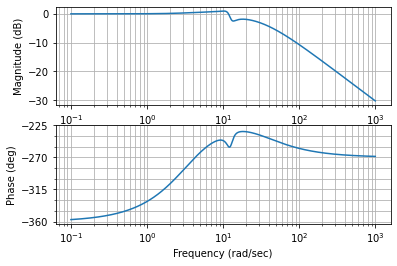

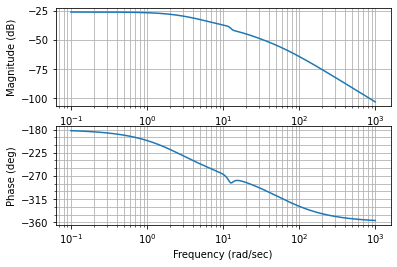

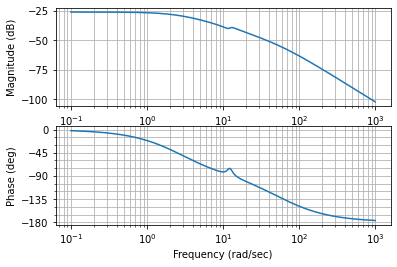

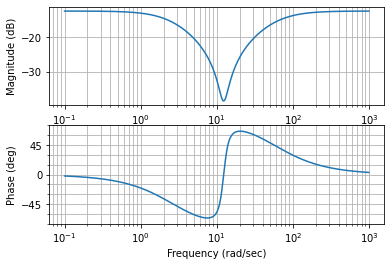

In [86]:
import control.matlab as ml
#FUNÇÕES DE TRANSFERÊNCIA CALCULADAS PELO MATHEMATICA

#FT velocidade da cabine
#FT posição angular da polia
#FT velocidade do contrapeso
FT_theta = ct.tf([0.244, 1.3176, 76.4696, 201.276, 5700.11],[1,62, 466, 9494, 23361])
FT_ve = ct.tf([-7.08, -20.1, -1140.6],[1,62, 466, 9494, 23361])
FT_vc = ct.tf([7.86, 20.1, 1140.6],[1,62, 466, 9494, 23361])
Gpid = ct.tf([4.29, 26.4007, 40.6174],[1,0])
Hf = FT_ve*Gpid/(1+FT_ve*Gpid)
mag, phase, w = ml.bode(Hf)
plt.show(1)
magv_e, phasev_e, w = ml.bode(FT_ve)
plt.show(2)
magv_c, phasev_c, w = ml.bode(FT_vc)
plt.show(3)
mag_theta, phase_theta, w = ml.bode(FT_theta)
plt.show(4)



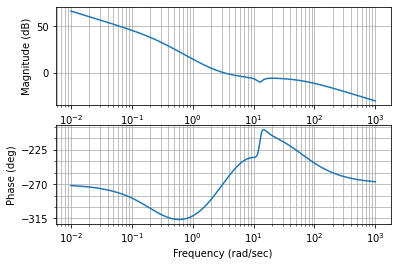

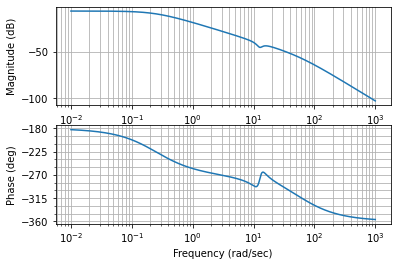

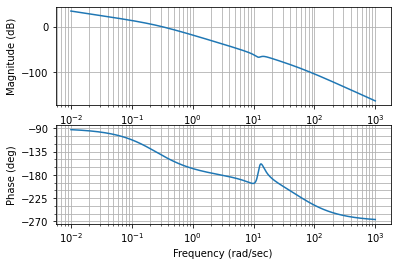

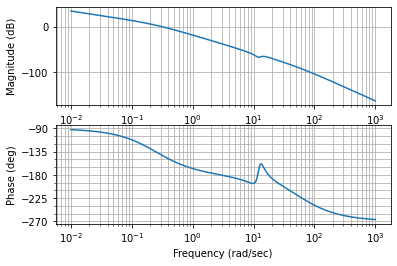

TransferFunction(array([-7.0800000e+00, -4.5906000e+02, -5.6854800e+03, -1.4726412e+05,
       -7.3863660e+05, -1.0870194e+07, -2.6676000e+06,  0.0000000e+00,
        0.0000000e+00]), array([1.00000000e+00, 1.24000000e+02, 4.76892000e+03, 7.63129400e+04,
       1.39340652e+06, 8.99130388e+06, 9.15782794e+07, 3.35617260e+07,
       2.80800000e+06, 0.00000000e+00, 0.00000000e+00]))

In [90]:
#FT velocidade da cabine
#FT posição angular da polia
#FT velocidade do contrapeso
FT_theta1 = ct.tf([7.86, 20.1, 1140],[1,62, 466, 9494, 2340, 0])
FT_ve1 = ct.tf([-7.08, -20.1, -1140, 0],[1,62, 466, 9494, 2340, 0])
FT_vc1 = ct.tf([7.86, 20.1, 1140.6],[1,62, 466, 9494, 2340, 0])
Gpid1 = ct.tf([4.29, 26.4007, 40.6174],[1,0])
Hf0 = FT_ve1/(1+FT_ve1)
Hf1 = FT_ve1*Gpid1/(1+FT_ve1*Gpid1)
Ha = FT_ve1*Gpid1
mag, phase, w = ml.bode(Ha)
plt.show(1)
magv_e, phasev_e, w = ml.bode(FT_ve1)
plt.show(2)
magv_c, phasev_c, w = ml.bode(FT_vc1)
plt.show(3)
mag_theta, phase_theta, w = ml.bode(FT_theta1)
plt.show(4)
Hf
ml.pole(FT_ve1)
Hf0

#ml.zero(s1)

Polos da função de transferência: [-56.72253622 +0.j          -2.51401982+12.61247239j
  -2.51401982-12.61247239j  -0.24942414 +0.j
   0.         +0.j           0.         +0.j        ]


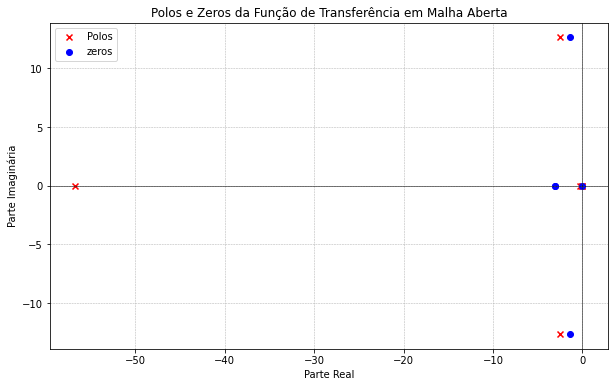

In [88]:
polos = ct.pole(Ha)
zeros = ct.zeros(Ha)
polos_array = np.array(polos)
print("Polos da função de transferência:", polos_array)
# Plotando os polos
plt.figure(figsize=(10, 6))
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='red', label='Polos')
plt.scatter(np.real(zeros), np.imag(zeros), marker = 'o', color ='blue', label = 'zeros')

# Configurações do gráfico
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title('Polos e Zeros da Função de Transferência em Malha Aberta')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.legend()
plt.show()

In [ ]:


# Gerar o diagrama de Bode
mag, phase, omega = ct.bode(Ha, dB=True, Plot=False)

# Encontrar a frequência de corte (onde a magnitude é 0 dB)
cutoff_index = np.where(np.abs(mag - 1) < 0.01)[0][0]
cutoff_freq = omega[cutoff_index]
gain_crossover_index = np.where(np.abs(20 * np.log10(mag)) < 0.1)[0][0]
gain_crossover_freq = omega[gain_crossover_index]
phase_at_gain_crossover = phase[gain_crossover_index]

# Calcular a margem de fase
phase_margin = 180 + np.degrees(phase_at_gain_crossover)

# Plotar o diagrama de Bode
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20 * np.log10(mag))  # Magnitude em dB
plt.axvline(cutoff_freq, color='r', linestyle='--', label=f'Cutoff frequency = {cutoff_freq:.2f} rad/s')
plt.ylabel('Magnitude (dB)')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega, np.degrees(phase))  # Fase em graus
plt.axvline(cutoff_freq, color='r', linestyle='--')
plt.ylabel('Fase (graus)')
plt.xlabel('Frequência (rad/s)')
plt.show()

print(f'A frequência de corte é aproximadamente {cutoff_freq:.2f} rad/s')
phase_margin
desired_phase = 0
desired_phase_rad = np.radians(desired_phase)

# Encontrar a frequência correspondente à fase desejada
# Especificar a fase desejada em graus
desired_phase = 0.78539816339744830961566084581988
desired_phase = 10

# Converter a fase para graus para comparação
phase_degrees = np.degrees(phase)

# Encontrar os índices onde a fase está mais próxima da fase desejada
indices = np.where(np.isclose(phase_degrees, desired_phase, atol=0.5))[0]

# Se não encontrar exatamente, aproximar ao mais próximo
if len(indices) == 0:
    closest_phase_index = np.argmin(np.abs(phase_degrees - desired_phase))
else:
    closest_phase_index = indices[0]

frequency_at_desired_phase = omega[closest_phase_index]
frequency_at_desired_phase
#Compensador por atraso de Fase 
#G_c = ct.tf([1,0.045],[1, 0.002530])
G_c = ct.tf([1,1.4],[1, 4.42])

mag, phase, w = ml.bode(G_c)
plt.show(6)

#Bode da planta com PID e Compensador
#Malha Aberta
mag, phase, w = ml.bode(G_c*Ha)
#plt.title('Diagrama de Bode da Planta em MA com Compensador')
plt.show(7)

#Malha Fechada
Hf2 = G_c*FT_ve*Gpid/(1+G_c*FT_ve*Gpid)

mag, phase, w = ml.bode(Hf1)
#plt.title('Diagrama de Bode da Planta em Malha Fechada sem Compensador')
plt.show(12)

Hf2 = G_c*FT_ve*Gpid/(1+G_c*FT_ve*Gpid)
mag, phase, w = ml.bode(Hf2)
#plt.title('Diagrama de Bode da Planta em Malha Fechada com Compensador')
plt.show(13)

plt.show(8)
# Plotar o diagrama de Nyquist
ct.nyquist_plot(Hf1)
plt.title('Diagrama de Nyquist da Planta em Malha Fechada sem Compensador')
plt.show(10)


ct.nyquist_plot(Hf2)
plt.title('Diagrama de Nyquist da Planta em Malha Fechada com Compensador')
plt.show(11)


polos = ct.pole(Hf2)
zeros = ct.zeros(Hf2)
polos_array = np.array(polos)
zeros_array = np.array(zeros)
print("Polos da função de transferência:", polos_array)
print("Zeros da função de transferência:", zeros_array)

# Plotando os polos
plt.figure(figsize=(10, 6))
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='red', label='Polos')
plt.scatter(np.real(zeros), np.imag(zeros), marker = 'o', color ='blue', label = 'zeros')

# Configurações do gráfico
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title('Polos e Zeros da Função de Transferência em Malha Aberta')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.legend()
plt.show()
Hf2

NameError: name 'Ha' is not defined